### Making necessary imports

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
# import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense

%matplotlib inline
sns.set_style('darkgrid')

### Using 'yfinance' library to extract history of Tata Motors, Tata Steel and TCS stocks

In [ ]:
s1 = yf.Ticker('TATAMOTORS.NS')
s2 = yf.Ticker('TATASTEEL.NS')
s3 = yf.Ticker('TCS.NS')

tatamotors = s1.history(period='15y')
tatamotors.insert(0, 'Date', tatamotors.index)
tatamotors['Date'] = tatamotors['Date'].dt.strftime("%Y-%m-%d")
tatamotors['Date'] = pd.to_datetime(tatamotors['Date'])
tatamotors.index=tatamotors['Date']

tatasteel = s2.history(period='15y')
tatasteel.insert(0, 'Date', tatasteel.index)
tatasteel["Date"] = tatasteel['Date'].dt.strftime("%Y-%m-%d")
tatasteel['Date'] = pd.to_datetime(tatasteel['Date'])
tatasteel.index=tatasteel['Date']

tcs = s3.history(period='15y')
tcs.insert(0, 'Date', tcs.index)
tcs["Date"] = tcs['Date'].dt.strftime("%Y-%m-%d")
tcs['Date'] = pd.to_datetime(tcs['Date'])
tcs.index=tcs['Date']

In [ ]:
tatamotors.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,,
2008-06-19,2008-06-19,89.376454,92.339457,88.854615,89.261475,2301714,0.0,0.0
2008-06-20,2008-06-20,89.703712,90.039820,85.493600,86.616890,2832945,0.0,0.0
2008-06-23,2008-06-23,86.616887,87.943600,84.909845,86.705330,3005511,0.0,0.0
2008-06-24,2008-06-24,86.678785,87.492504,84.113796,85.475891,3272384,0.0,0.0
2008-06-25,2008-06-25,85.617417,85.758934,80.664346,83.875000,2821350,0.0,0.0


In [ ]:
# tatamotors = pd.read_csv('data/TATAMOTORS.csv')
# tatasteel = pd.read_csv('data/TATASTEEL.csv')
# tcs = pd.read_csv('data/TCS.csv')
print(tatasteel.shape, tatamotors.shape, tcs.shape)

(3697, 8) (3697, 8) (3697, 8)


### Preprocessing and Data Cleaning

In [ ]:
tcs.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,,
2008-06-19,2008-06-19,163.564580,166.862814,163.518126,165.004654,3289068,0.0,0.0
2008-06-20,2008-06-20,167.215875,167.215875,156.373501,160.517197,8157760,0.0,0.0
2008-06-23,2008-06-23,160.517255,163.415994,156.642994,159.513855,3572312,0.0,0.0
2008-06-24,2008-06-24,157.943688,161.232635,153.000984,156.903122,9287176,0.0,0.0
2008-06-25,2008-06-25,156.085494,164.447217,154.468892,162.923523,5914196,0.0,0.0


In [ ]:
tatamotors.isna().sum()

Date            0
Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64

In [ ]:
tatasteel.isna().sum()

Date            0
Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64

In [ ]:
tcs.isna().sum()

Date            0
Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64

In [ ]:
tatamotors.dtypes

Date            datetime64[ns]
Open                   float64
High                   float64
Low                    float64
Close                  float64
Volume                   int64
Dividends              float64
Stock Splits           float64
dtype: object

In [ ]:
print(tatamotors.duplicated().sum())
print(tatasteel.duplicated().sum())
print(tcs.duplicated().sum())

0
0
0


In [ ]:
tatamotors['month'] = tatamotors['Date'].dt.month
tatamotors['year'] = tatamotors['Date'].dt.year
tatamotors['day'] = tatamotors['Date'].dt.day

tatasteel['month'] = tatasteel['Date'].dt.month
tatasteel['year'] = tatasteel['Date'].dt.year
tatasteel['day'] = tatasteel['Date'].dt.day

tcs['month'] = tcs['Date'].dt.month
tcs['year'] = tcs['Date'].dt.year
tcs['day'] = tcs['Date'].dt.day

### Price Comparison

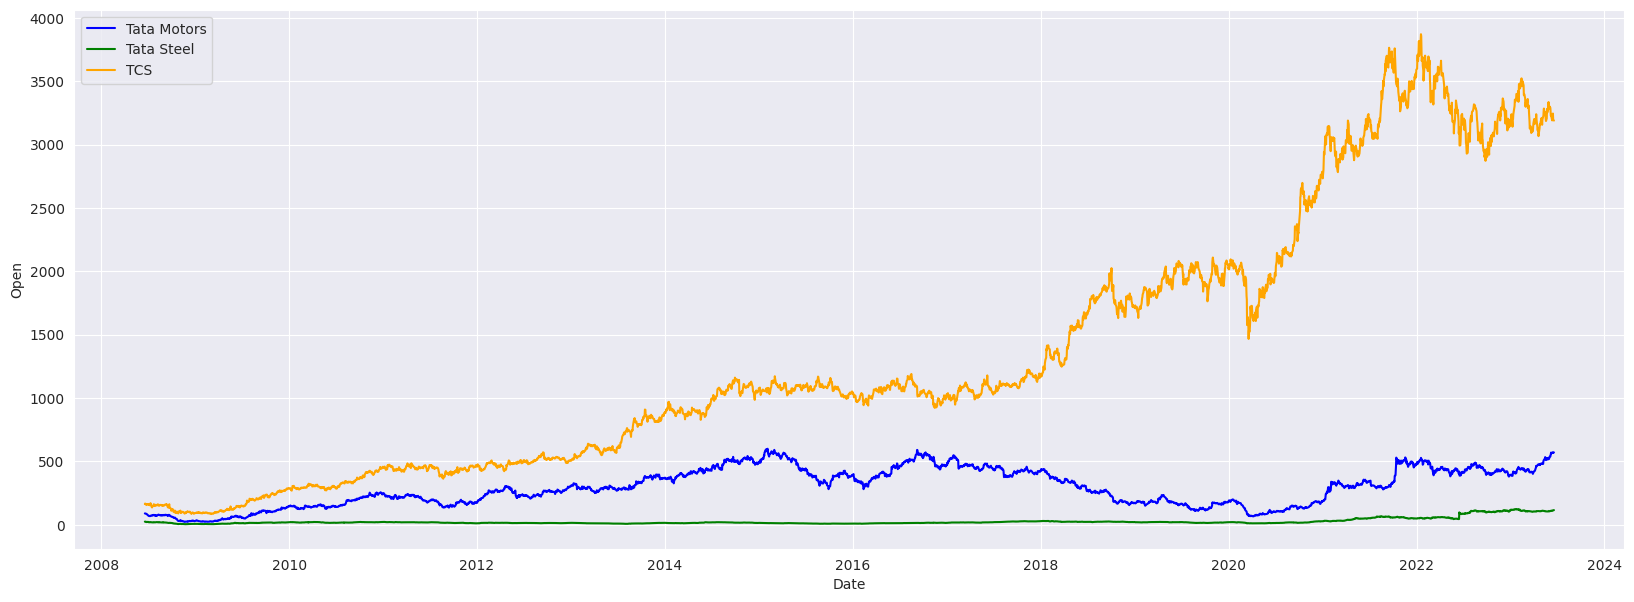

In [ ]:
plt.figure(figsize=(20, 7))
sns.lineplot(data=tatamotors, x = 'Date', y = 'Open', label='Tata Motors', color='blue')
sns.lineplot(data=tatasteel, x = 'Date', y = 'Open', label='Tata Steel', color='green')
sns.lineplot(data=tcs, x = 'Date', y = 'Open', label='TCS', color='orange')

plt.legend(loc='upper left')
plt.show()

### Volume Comparison

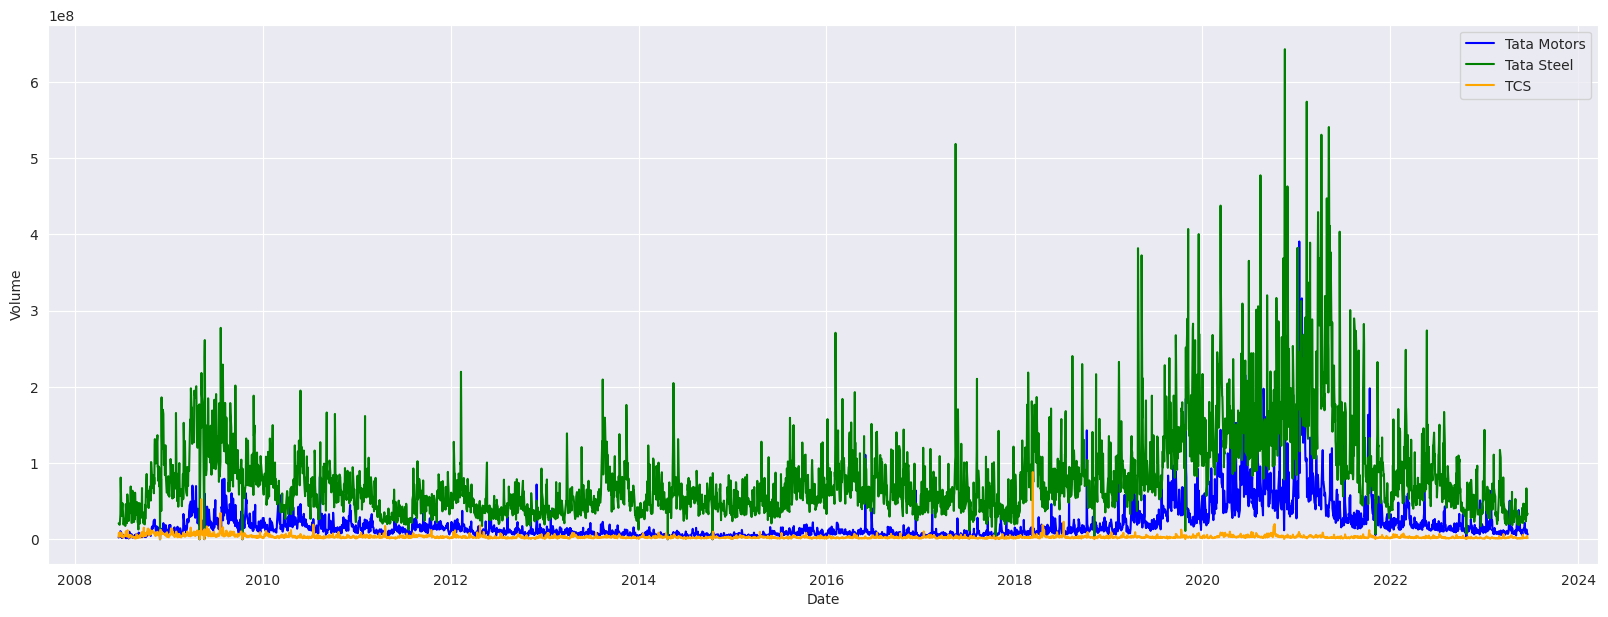

In [ ]:
plt.figure(figsize=(20, 7))
sns.lineplot(data=tatamotors, x = 'Date', y = 'Volume',color = 'blue', label='Tata Motors')
sns.lineplot(data=tatasteel, x = 'Date', y = 'Volume',color = 'green', label = 'Tata Steel')
sns.lineplot(data=tcs, x = 'Date', y = 'Volume',color = 'orange', label='TCS')
plt.legend()

plt.show()

### ROI (Return on Investment)

In [ ]:
tatasteel.tail(1)

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,month,year,day
Date,,,,,,,,,,,
2023-06-19,2023-06-19,115.449997,115.599998,113.050003,114.099998,33487100,0.0,0.0,6,2023,19


In [ ]:
x = tcs.head(70).copy()

In [ ]:
print(x[x['day'] == 25])
xsum = x[x['day'] == 25]['Low'].sum()
print(xsum)

                 Date        Open        High         Low       Close  \
Date                                                                    
2008-06-25 2008-06-25  156.085494  164.447217  154.468892  162.923523   
2008-07-25 2008-07-25  148.504227  157.850774  145.308188  148.504227   
2008-08-25 2008-08-25  153.661936  155.713249  152.170073  152.580338   
2008-09-25 2008-09-25  132.980982  134.239742  125.139377  128.374863   

              Volume  Dividends  Stock Splits  month  year  day  
Date                                                             
2008-06-25   5914196        0.0           0.0      6  2008   25  
2008-07-25   8842536        0.0           0.0      7  2008   25  
2008-08-25    942244        0.0           0.0      8  2008   25  
2008-09-25  15122632        0.0           0.0      9  2008   25  
577.0865291495554


In [ ]:
x[x['day'] == 25].shape[0]

4

In [ ]:
def roi(df):
    sum = 0  #total amount invested
    shares = 0  #number of shares owned

    #calculate total amount invested and numebr of shares owned
    # for i in range(len(df)):
    #     if df.loc[i, 'day'] == 30:
    #         sum += df.loc[i, 'Open']
    #         shares += 1

    sum = df[df['day'] == 30]['Open'].sum()
    shares = df[df['day'] == 30].shape[0]

    print("Total Invested in Company = Rs ",round(sum,2))
    print("Shares Owned of Company = ",shares)
    print("Average Investment of 1 share = Rs ",round((sum/shares),2))

    end = df.loc[df.index[-1], 'Open']

    #calculating investment results.
    res = round((end*shares)-sum, 2)
    res_roi = round((res/sum)*100, 2)

    #displaying results
    print("\ninvestment results: ")
    if(res < 0):
        print("net unrealised loss = Rs ", res)
    else:
        print("net unrealised profit = Rs ", res)

    print(f'Company\'s ROI from 2000-01-03 to 2021-04-30 = {res_roi} %')

    return res, shares

In [ ]:
r_tatamotors, s_tatamotors = roi(tatamotors)

Total Invested in Company = Rs  33042.11
Shares Owned of Company =  115
Average Investment of 1 share = Rs  287.32

investment results: 
net unrealised profit = Rs  32582.64
Company's ROI from 2000-01-03 to 2021-04-30 = 98.61 %


In [ ]:
r_tatasteel, s_tatasteel = roi(tatasteel)

Total Invested in Company = Rs  2828.61
Shares Owned of Company =  115
Average Investment of 1 share = Rs  24.6

investment results: 
net unrealised profit = Rs  10448.14
Company's ROI from 2000-01-03 to 2021-04-30 = 369.37 %


In [ ]:
r_tcs, s_tcs = roi(tcs)

Total Invested in Company = Rs  150408.32
Shares Owned of Company =  115
Average Investment of 1 share = Rs  1307.9

investment results: 
net unrealised profit = Rs  216441.68
Company's ROI from 2000-01-03 to 2021-04-30 = 143.9 %


<Axes: title={'center': 'Profit/Loss'}, xlabel='Stocks', ylabel='Amount'>

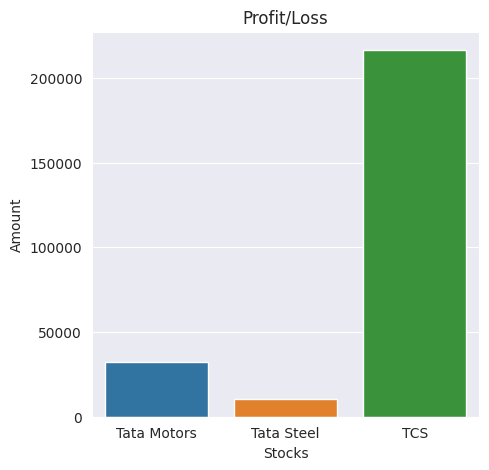

In [ ]:
plt.figure(figsize=(5, 5))

stock = ['Tata Motors', 'Tata Steel', 'TCS']
amt = [r_tatamotors, r_tatasteel, r_tcs]
plt.title('Profit/Loss')
plt.xlabel('Stocks')
plt.ylabel('Amount')

sns.barplot(x=stock, y=amt)

### Portfolio Allocation

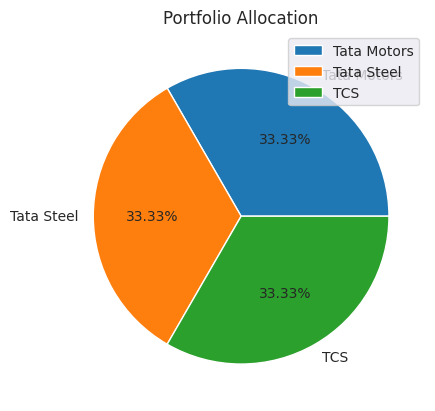

In [ ]:
stock = ['Tata Motors', 'Tata Steel', 'TCS']
shares = [s_tatamotors, s_tatasteel, s_tcs]

plt.pie(shares, labels = stock, autopct='%1.2f%%')
plt.legend(title='')
plt.title('Portfolio Allocation')
plt.show()

### Stocks Price Predictions using LSTM Neural networks

In [ ]:
n = int(tcs.shape[0]*0.8)
d = 60
print(n)

2957


In [ ]:
data = tcs.sort_index(ascending=True, axis=0)
ndf = pd.DataFrame(columns=['Date', 'Close'])
ndf['Date'] = data['Date'].copy()
ndf['Close'] = data['Close'].copy()
ndf.drop('Date', inplace=True, axis=1)
finaldataset = ndf.values
ndf.head()

,Close
Date,
2008-06-19,165.004654
2008-06-20,160.517197
2008-06-23,159.513855
2008-06-24,156.903122
2008-06-25,162.923523


In [ ]:
train_data = finaldataset[0:n, :]
valid_data = finaldataset[n:, :]

scale = MinMaxScaler(feature_range=(0, 1))
scaled_data = scale.fit_transform(finaldataset)

In [ ]:
fxtrain, fytrain = [], []
for i in range(d,len(train_data)):
    fxtrain.append(scaled_data[i-d:i,0])
    fytrain.append(scaled_data[i,0])

fxtrain, fytrain = np.array(fxtrain),np.array(fytrain)
fxtrain=np.reshape(fxtrain,(fxtrain.shape[0],fxtrain.shape[1],1))

In [ ]:
lstm_model=Sequential()
lstm_model.add(LSTM(units=50, return_sequences=True,input_shape=(fxtrain.shape[1],1)))
lstm_model.add(Dropout(0.2))
lstm_model.add(LSTM(units=50, return_sequences=True))
lstm_model.add(Dropout(0.2))
lstm_model.add(LSTM(units=50))
lstm_model.add(Dropout(0.2))
lstm_model.add(Dense(units=1))

In [ ]:
lstm_model.compile(loss='mse', optimizer='adam')
lstm_model.fit(fxtrain, fytrain, epochs=10, batch_size=32, verbose=2)

Epoch 1/10
91/91 - 16s - loss: 0.0034 - 16s/epoch - 175ms/step
Epoch 2/10
91/91 - 10s - loss: 8.4554e-04 - 10s/epoch - 108ms/step
Epoch 3/10
91/91 - 10s - loss: 6.9221e-04 - 10s/epoch - 107ms/step
Epoch 4/10
91/91 - 8s - loss: 7.1921e-04 - 8s/epoch - 92ms/step
Epoch 5/10
91/91 - 10s - loss: 6.1456e-04 - 10s/epoch - 113ms/step
Epoch 6/10
91/91 - 10s - loss: 5.8367e-04 - 10s/epoch - 106ms/step
Epoch 7/10
91/91 - 9s - loss: 5.7125e-04 - 9s/epoch - 101ms/step
Epoch 8/10
91/91 - 9s - loss: 6.0666e-04 - 9s/epoch - 98ms/step
Epoch 9/10
91/91 - 10s - loss: 4.9605e-04 - 10s/epoch - 107ms/step
Epoch 10/10
91/91 - 10s - loss: 4.7239e-04 - 10s/epoch - 106ms/step


In [ ]:
inputs_data=ndf[len(ndf)-len(valid_data)-d:].values
inputs_data=inputs_data.reshape(-1,1)
inputs_data=scale.transform(inputs_data)

In [ ]:
X_test=[]
for i in range(d,inputs_data.shape[0]):
    X_test.append(inputs_data[i-d:i,0])
X_test=np.array(X_test)

X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
predicted_closing_price=lstm_model.predict(X_test)
predicted_closing_price=scale.inverse_transform(predicted_closing_price)

24/24 [==============================] - 3s 49ms/step


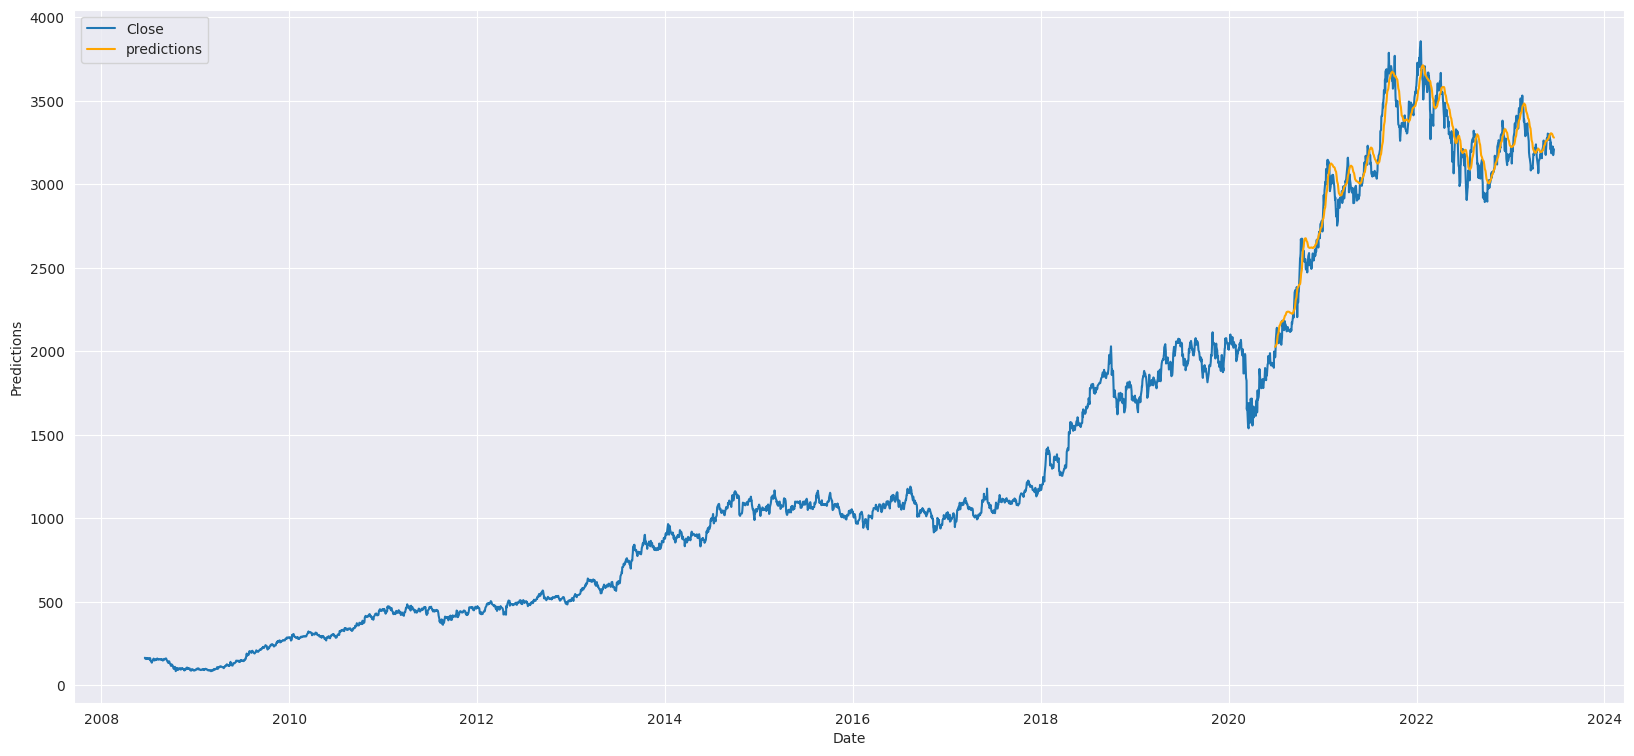

In [ ]:
plt.figure(figsize=(20, 9))

sns.lineplot(ndf)
sns.lineplot(valid_data['Predictions'], color='orange', dashes=False, label='predictions')
plt.legend(loc='upper left')
plt.show()